In [1]:
from torchvision import models

In [2]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

In [3]:
alexnet = models.AlexNet()

In [4]:
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


In [5]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

In [7]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount("/content/gdrive")
%cd gdrive/My Drive/deep_learning_with_pytorch/dlwpt-code

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/deep_learning_with_pytorch/dlwpt-code


In [32]:
from PIL import Image
img = Image.open("data/p1ch2/mix.jpeg")

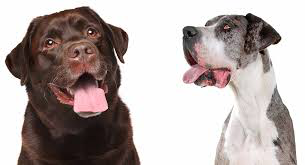

In [33]:
img

In [34]:
img_t = preprocess(img)

In [35]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

In [36]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [37]:
out = resnet(batch_t)
out

tensor([[ 8.4620e-01, -2.0324e+00,  3.0579e-01,  3.9937e-01, -1.6172e+00,
          1.3452e+00, -9.3657e-01, -2.4503e+00, -1.1722e+00, -4.3222e+00,
         -2.3297e+00, -3.2059e+00, -1.7342e+00, -2.2844e+00, -3.5157e+00,
         -3.6041e+00,  2.6127e-01, -4.9355e+00, -2.8771e+00, -1.5998e+00,
         -3.6827e+00, -2.5047e+00, -2.4697e+00, -9.6505e-01, -5.8422e-01,
         -2.8565e+00, -2.0841e+00, -2.9018e+00, -7.6895e-01, -1.2248e+00,
         -2.2577e+00, -3.4729e+00, -1.7974e+00, -1.2103e+00, -1.0620e+00,
         -5.9855e-01, -1.0059e+00, -2.1214e+00,  2.5711e-01, -2.0631e+00,
         -2.0015e+00, -2.4570e+00, -3.4485e+00, -1.6004e+00, -2.1834e+00,
         -1.3558e+00, -2.9077e+00, -5.4937e-01, -3.0854e+00, -3.5751e+00,
         -4.1598e+00,  6.5393e-01, -9.7143e-01, -1.1395e+00, -3.6252e+00,
         -2.9060e+00, -1.2637e+00, -1.9316e+00, -3.0422e+00, -1.1750e+00,
          5.9077e-01, -5.0736e-01,  7.9762e-01, -2.9069e-02, -1.4203e+00,
         -1.9576e+00, -1.3162e+00, -6.

In [38]:
with open('data/p1ch2/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [39]:
_, index = torch.max(out, 1)

In [40]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier',
 39.33713912963867)

In [41]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier',
  39.33713912963867),
 ('Labrador retriever', 24.215063095092773),
 ('Staffordshire bullterrier, Staffordshire bull terrier', 11.061593055725098),
 ('bull mastiff', 5.810595512390137),
 ('Saint Bernard, St Bernard', 3.6906049251556396)]